### 1. 캐글에서 설명변수의 개수가 5~8개이며 반응변수가 연속형인 데이터를 하나 선택하고 아래 정보를 제출하시오.

#### 1) 데이터 이름과 변수명, 데이터 크기

`-` **데이터 이름** : **Sleep Time Prediction**

In [2]:
import pandas as pd

In [32]:
Sleep = pd.read_csv("sleeptime_prediction_dataset.csv")

`-` **변수명**

* `WorkoutTime` : **활동**에 사용한 시간 (hours/day)
* `ReadingTime` : **독서**에 사용한 시간 (hours/day)
* `PhoneTime` : **휴대폰** 사용 시간 (hours/day)
* `WorkHours` : **일**에 사용한 시간 (hours/day)
* `CaffeineIntake` : **카페인** 소비량 (mg/day)
* `RelaxationTime` : **휴식**에 사용한 시간 (hours/day)
* `SleepTime` : **수면**에 사용한 총 시간 (hours/night)

In [33]:
Sleep.columns

Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime'],
      dtype='object')

`-` **데이터 크기**

In [34]:
Sleep.shape

(2000, 7)

In [35]:
print(f"행(데이터)의 수: {Sleep.shape[0]}")
print(f"열(변수)의 수: {Sleep.shape[1]}")

행(데이터)의 수: 2000
열(변수)의 수: 7


#### 2) 각 변수별 기초 통계량(평균과 분산, 범주형인 경우 범주별 비율)

`-` 모든 변수에 타이빙 연속형이고, null 값이 없는 것을 확인

In [78]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


`-` 각 변수의 평균과 분산 출력

In [81]:
summary_stats = pd.DataFrame({
    'Mean': Sleep.mean(),
    'Variance': Sleep.var()
})

print(summary_stats)

                      Mean     Variance
WorkoutTime       1.495915     0.768497
ReadingTime       0.992785     0.333278
PhoneTime         2.985195     1.326588
WorkHours         6.926945     2.971634
CaffeineIntake  147.493780  7165.815344
RelaxationTime    1.010955     0.339445
SleepTime         4.884375     4.116403


`-` 추가적인 기초 통계량

In [83]:
Sleep.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955,4.884375
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619,2.028892
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,0.150000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000,3.840000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000,4.600000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000,5.470000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000,19.810000


#### 3) 반응변수와 각 변수들 간의 산점도(행렬 형태 추천)

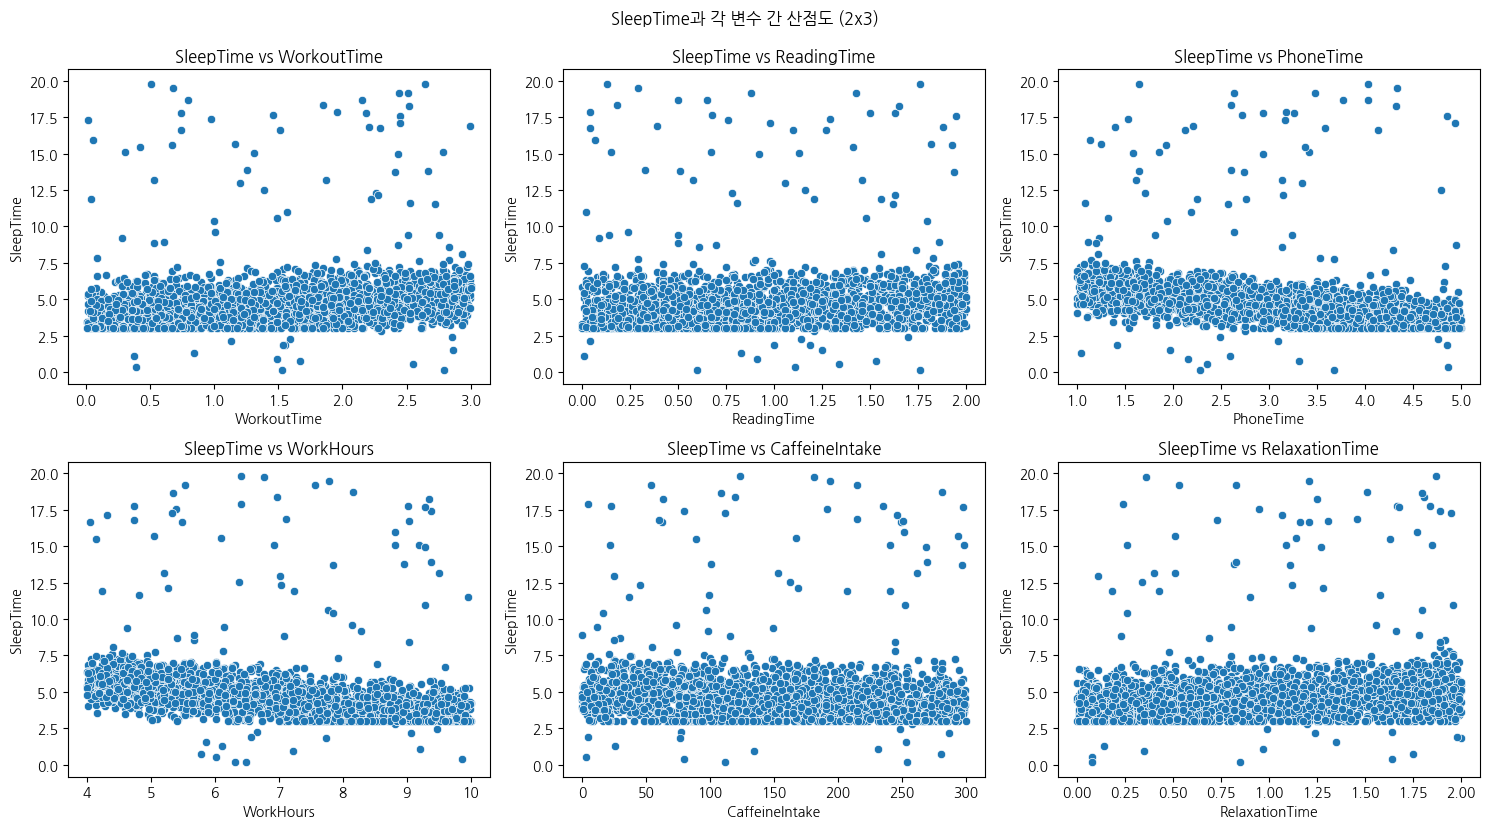

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# 설명변수들
features = ['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
            'CaffeineIntake', 'RelaxationTime']

# 서브플롯 설정
fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 
axes = axes.flatten() 

# 각 변수에 대해 산점도 그리기
for i, feature in enumerate(features):
    sns.scatterplot(x=Sleep[feature], y=Sleep['SleepTime'], ax=axes[i])
    axes[i].set_title(f'SleepTime vs {feature}')

# 여백 자동 조정
plt.tight_layout()
plt.suptitle("SleepTime과 각 변수 간 산점도 (2x3)", y=1.03)
plt.show()

### 2. 다음을 시행하시오 (모두 다 파이썬이나 R 이용)

#### 1) 모든 변수를 이용하여 회귀분석을 시행하고 모형의 유의성을 유의수준 0.05에서 검정하시오

In [36]:
import statsmodels.api as sm

`-` 독립변수(X)와 종속변수(y) 로 분리

In [37]:
X = Sleep.drop(columns=['SleepTime'])
y = Sleep['SleepTime']

`-` 절편을 위한 상수항 추가

In [131]:
X = sm.add_constant(X)

`-` 상수항 이름 const에서 intercept로 변경

In [43]:
X.columns= ['intercept','WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime']

In [46]:
print(X[:5])

   intercept  WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0        1.0         1.12         0.52       3.29       7.89          216.08   
1        1.0         2.85         0.49       4.22       5.03          206.18   
2        1.0         2.20         1.81       4.04       9.23           28.73   
3        1.0         1.80         0.50       1.62       7.68          276.77   
4        1.0         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  
0            0.75  
1            0.67  
2            0.35  
3            1.21  
4            0.95  


`-` F-statistic : 전체 회귀모형이 통계적으로 유의한지 검정하는 통계량

* `Prob (F-statistic)` : F-검정의 **p-value**
* 이 값이 (2.71e-127) **매우 작으므로 전체 모형이 유의** 하다고 할 수 있다.

In [47]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SleepTime   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          2.71e-127
Time:                        11:13:58   Log-Likelihood:                -3949.4
No. Observations:                2000   AIC:                             7913.
Df Residuals:                    1993   BIC:                             7952.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          7.8462      0.231     33.

#### 2) $\hat{\sigma^2} = \sum_{i=1}^{n}\frac{(\hat{y}_i-y_i)^2}{n-p-1}$를 구하시오. 모든 변수들과 절편을 포함한 회귀분석에서의 예측을 이용하며 $p$는 사용한 모든 변수들의 개수임.

`-` 예측값

In [55]:
y_pred = results.fittedvalues

`-` n, p 설정

In [56]:
n = len(y)
p = X.shape[1]-1

`-` $\hat{\sigma^2}$ 계산

In [97]:
sigma_squared_hat = np.sum(results.resid**2 / (n-p-1))

`-` $\hat{\sigma^2}$ = 3.0497

In [98]:
print(f'추정된 sigma^2 : {sigma_squared_hat:.4f}')

추정된 sigma^2 : 3.0497


#### 3) 하나의 변수나 두 개의 변수를 사용하여 각 모형에서 $C_p=RSS/\hat{\sigma^2}+2p^*$를 계산하고 결과를 산점도로 표시하시오(가로축은 사용한 변수의 개수, 세로축은 계산된 $C_p^*$값). 여기에서 RSS는 회귀모형의 잔차곱합이며 $p^*$는 RSS에서 사용한 변수들의 개수이며, 하나의 변수를 사용하면 $p$개의 모형이 두 개의 변수를 사용하면 $p(p-1)$개의 모형이 고려될 수 있음(산점도에 총 $p+p(p-1))$개의 점이 찍혀야함)

`-` 변수가 두개 일때는 p(p-1)/2 개의 점이 찍혀야하는것 아닌가요?..(중복제거)

In [89]:
import itertools
import matplotlib.pyplot as plt

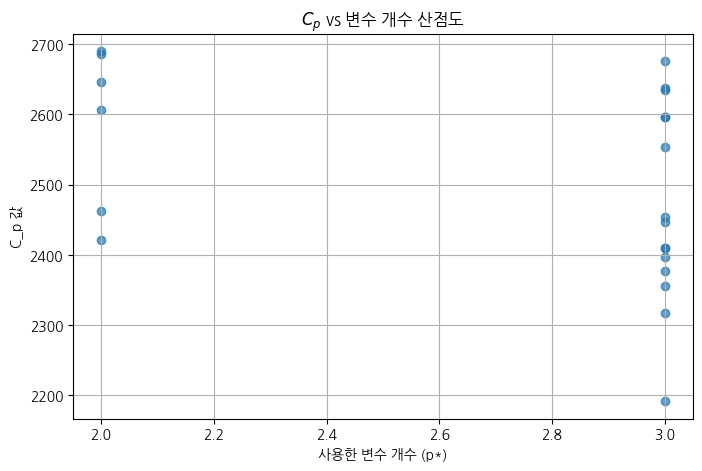

In [107]:
cp_list = []
pstar_list = []
used_features = []

# === 변수 1개씩 사용하는 모형들 ===
for var in features:
    used_features.append(var)
    X = sm.add_constant(Sleep[[var]])  # 절편 포함
    model = sm.OLS(y, X).fit()
    rss = sum((y-model.fittedvalues)**2)
    p_star = 2  # 변수 1개 + 절편
    cp = rss / sigma_squared_hat + 2 * p_star
    cp_list.append(cp)
    pstar_list.append(p_star)

# === 변수 2개씩 사용하는 모형들 ===
for var1, var2 in itertools.combinations(features, 2):
    used_features.append([var1,var2])
    X = sm.add_constant(Sleep[[var1, var2]])
    model = sm.OLS(y, X).fit()
    rss = sum((model.fittedvalues - y)**2)
    p_star = 3  # 변수 2개 + 절편
    cp = rss / sigma_squared_hat + 2 * p_star
    cp_list.append(cp)
    pstar_list.append(p_star)


# === 산점도 그리기 ===
plt.figure(figsize=(8, 5))
plt.scatter(pstar_list, cp_list, alpha=0.7)
plt.xlabel("사용한 변수 개수 (p*)")
plt.ylabel("C_p 값")
plt.title("$C_p$ vs 변수 개수 산점도")
plt.grid(True)
plt.show()


#### 4) 계산한 3)의 값들 중 가장 작은 값은 어떤 변수(들)을 사용할 때인가?

`-` `PhoneTime`, `WorkHours` 를 사용할 때 $C_p$의 값이 가장 작다

In [112]:
used_features[np.argmin(cp_list)]

['PhoneTime', 'WorkHours']

### 3. 반응변수가 중앙값을 초과할 때 1, 이하일 때 0으로 하여 아래를 시행하시오.

#### 1) 로지스틱 회귀분석을 시행해서 혼동행렬을 구하시오

In [180]:
from ISLP import confusion_table
from ISLP.models import (ModelSpec as MS,summarize)
from sklearn.model_selection import train_test_split

`-` y 를 반응변수 `SleepTime`의 중앙값을 초과하면 1, 이하이면 0

In [153]:
X = Sleep.drop(columns=['SleepTime'])
y = (Sleep['SleepTime']>median_sleep).astype(int)

`-` 상수항 추가

In [154]:
design = MS(X)

In [155]:
X=design.fit_transform(X)

In [157]:
X[:5]

,intercept,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime
0,1.0,1.12,0.52,3.29,7.89,216.08,0.75
1,1.0,2.85,0.49,4.22,5.03,206.18,0.67
2,1.0,2.20,1.81,4.04,9.23,28.73,0.35
3,1.0,1.80,0.50,1.62,7.68,276.77,1.21
4,1.0,0.47,0.54,1.60,4.94,170.54,0.95


`-` train과 test로 분리 비율 0.7 : 0.3

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

`-` 로지스틱 회귀분석 모델 생성 및 적합

In [182]:
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
print(summarize(results))

                  coef  std err       z  P>|z|
WorkoutTime     1.6071    0.105  15.348  0.000
ReadingTime     1.5103    0.139  10.838  0.000
PhoneTime      -1.0310    0.072 -14.263  0.000
WorkHours      -0.4311    0.036 -11.868  0.000
CaffeineIntake  0.0004    0.001   0.487  0.626
RelaxationTime  1.7463    0.141  12.413  0.000


`-` 예측한 확률이 0.5보다 크면 1로, 작으면 0으로 `labels`에 저장

In [192]:
probs = results.predict(exog=X_test)
labels = np.array([0]*len(y_test))  # 기본값 0
labels[probs > 0.5] = 1 
print(list(probs)[:5])
print(labels[:5])

[0.9911024037508189, 0.13970493273847814, 0.9362503403933953, 0.9184685442097736, 0.012038711545818204]
[1 0 1 1 0]


`-` **혼동행렬**

In [193]:
confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,248,68
1,42,242


`-` 정확도

In [195]:
np.mean(labels == y_test)

0.8166666666666667

#### 2) LDA를 시행해서 혼동행렬을 구하시오

In [169]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

`-` 상수항이 없는 X데이터 사용

In [243]:
X = Sleep.drop(columns=['SleepTime'])
y = (Sleep['SleepTime']>median_sleep).astype(int)

`-` train과 test로 분리 비율 0.7:0.3

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

`-` LDA 적합 및 예측

In [245]:
lda = LDA(store_covariance=True)

lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)

print(lda_pred[:15])

[1 0 1 1 0 0 0 1 1 0 0 1 0 0 1]


`-` 혼동행렬

In [246]:
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,288,15
1,2,295


#### 3) 2)번에서 민감도와 특이도는 어떻게 되는가. 민감도는 1을 기준으로 함

`-` 민감도 TP/(TP+FN)

`-` 특이도 TN/(TN+FP)

* TP : 실제1 $\to$ 예측1 (정답)
* FN : 실제1 $\to$ 예측0 (틀림)
* TN : 실제0 $\to$ 예측0 (정답)
* FP : 실제0 $\to$ 예측1 (틀림)

`-` 혼동행렬

In [247]:
cm = confusion_table(lda_pred,y_test)

In [248]:
cm

Truth,0,1
Predicted,,
0,288,15
1,2,295


`-` 2차원구조 인덱싱을 통해 값 대입

In [249]:
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

In [250]:
TP, FN, TN, FP

(295, 15, 288, 2)

`-` 민감도 특이도 계산

In [251]:
# 민감도 (class 1 기준)
sensitivity = TP / (TP + FN)

# 특이도 (class 0 기준)
specificity = TN / (TN + FP)


print(f"민감도 (class=1): {sensitivity:.2f}")
print(f"특이도 (class=0): {specificity:.2f}")

민감도 (class=1): 0.95
특이도 (class=0): 0.99


#### 4) 3)번에서 예측의 규칙을 바꾸어 1에 대한 예측확률이 0.20 이상일 때 1로 예측하면 민감도와 특이도는 어떻게 변하는가?

`-` 1 값에 대한 확률 계산

In [252]:
probs[:5]

array([0.99768879, 0.0077565 , 0.96238128, 0.99887321, 0.0017131 ])

In [253]:
probs = lda.predict_proba(X_test)[:,1] 

`-` 예측기준 0.20으로 설정해 새로운 예측값 생성

In [254]:
custom_pred = (probs > 0.20).astype(int)

In [255]:
cm = confusion_table(custom_pred,y_test)

`-` 새로운 혼동행렬

In [256]:
cm

Truth,0,1
Predicted,,
0,211,8
1,79,302


In [257]:
sum(custom_pred ==1)

381

In [258]:
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

In [259]:
TP, FN, TN, FP

(302, 8, 211, 79)

`-` 민감도 특이도 계산

In [260]:
# 민감도 (class 1 기준)
sensitivity = TP / (TP + FN)

# 특이도 (class 0 기준)
specificity = TN / (TN + FP)


print(f"민감도 (class=1): {sensitivity:.2f}")
print(f"특이도 (class=0): {specificity:.2f}")

민감도 (class=1): 0.97
특이도 (class=0): 0.73


`-` 클래스 1로 분류되는 사례 TP, FP가 늘어나면서 민감도가 증가하고 특이도가 감소하였다